In [2]:
# Заменить на свой путь
import sys
sys.path.append(r'D:\repositories\baltika_hack')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Поломки

In [3]:
breakdowns_df = pd.read_excel(r'Поломки за 5 лет.xlsx')
breakdowns_df.tail()

,start,end,reason_id,reason_group,reason,duration
526,2024-11-04 16:04:20,2024-11-04 16:07:21,2010004,Breakdowns,Замена тормозной пластины на 10 наполнителе.,3.016667
527,2024-11-04 19:15:34,2024-11-04 19:17:41,2010004,Breakdowns,Замена тормозной пластины на 66 наполнителе,2.100000
528,2024-11-05 09:48:48,2024-11-05 09:51:31,2010004,Breakdowns,замена тормозной пластины,2.716667
529,2024-11-21 03:12:49,2024-11-21 03:16:28,2010004,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.650000
530,2024-11-21 03:24:45,2024-11-21 03:28:36,2010004,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.833333


## Общая информация

In [4]:
breakdowns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   start         531 non-null    datetime64[ns]
 1   end           531 non-null    datetime64[ns]
 2   reason_id     531 non-null    int64         
 3   reason_group  531 non-null    object        
 4   reason        531 non-null    object        
 5   duration      531 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 25.0+ KB


In [8]:
print(breakdowns_df.describe())

# Проверка на пропуски
print("\nКоличество пропусков в каждом столбце:")
print(breakdowns_df.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:")
print(breakdowns_df.duplicated().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:")
print(breakdowns_df.duplicated().sum())

                               start                            end  \
count                            531                            531   
mean   2022-01-26 17:41:28.732579840  2022-01-26 17:47:36.073446400   
min              2020-01-08 02:04:44            2020-01-08 02:08:29   
25%       2021-03-30 09:55:06.500000     2021-03-30 09:58:36.500000   
50%              2022-02-03 14:04:06            2022-02-03 14:07:36   
75%       2022-11-15 18:41:40.500000            2022-11-15 18:47:59   
max              2024-11-21 03:24:45            2024-11-21 03:28:36   
std                              NaN                            NaN   

          reason_id    duration  
count  5.310000e+02  531.000000  
mean   2.010004e+06    6.117389  
min    2.010003e+06    2.033333  
25%    2.010004e+06    3.125000  
50%    2.010004e+06    4.266667  
75%    2.010004e+06    5.916667  
max    2.010004e+06  110.266667  
std    7.502265e-02    9.160828  

Количество пропусков в каждом столбце:
start         

## Анализ числовых признаков (duration)

Распределение продолжительности поломок

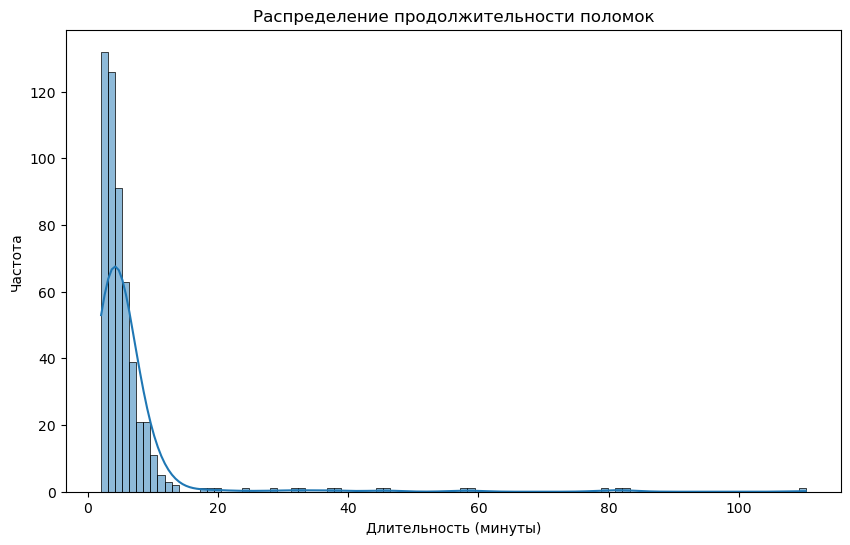

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(breakdowns_df['duration'], bins=100, kde=True)
plt.title('Распределение продолжительности поломок')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Частота')
plt.show()

Произведем проверку длительности простоя с датой начала и окончания

In [14]:
breakdowns_df['calculated_duration'] = (breakdowns_df['end'] - breakdowns_df['start']).dt.total_seconds() / 60

In [15]:
breakdowns_df['duration_diff'] = breakdowns_df['duration'] - breakdowns_df['calculated_duration']
print("\nМаксимальное отклонение между duration и calculated_duration:")
print(breakdowns_df['duration_diff'].abs().max())


Максимальное отклонение между duration и calculated_duration:
2.383333333333333


Вывод: заметили отклонения между предоставляемым и фактическим временем простоя

## Анализ категориальных признаков

In [16]:
# Анализ категориальных признаков
print("\nУникальные значения reason_group:")
print(breakdowns_df['reason_group'].value_counts())

print("\nУникальные причины поломок (reason):")
print(breakdowns_df['reason'].value_counts().head(10))


Уникальные значения reason_group:
reason_group
Breakdowns     528
Поломки/КИП      3
Name: count, dtype: int64

Уникальные причины поломок (reason):
reason
замена тормозной пластины                                    5
устранение недоливов на 38 наполнителе.                      4
Замена тормозной пластины №10                                4
КИП сбой программы розлива                                   4
КИП.МЕХ. Сбой пластичной смазки.                             3
Замена сбросного дросселя №10                                3
Замена нагнетательного дросселя №10                          3
устранение недоливов на 19 и 70 наполтителях.                3
Недолив. Пустые банки. 108/12. Замена сбросного дросселя.    2
замена дросселя 58                                           2
Name: count, dtype: int64


Анализ распределения длительности по группам причин

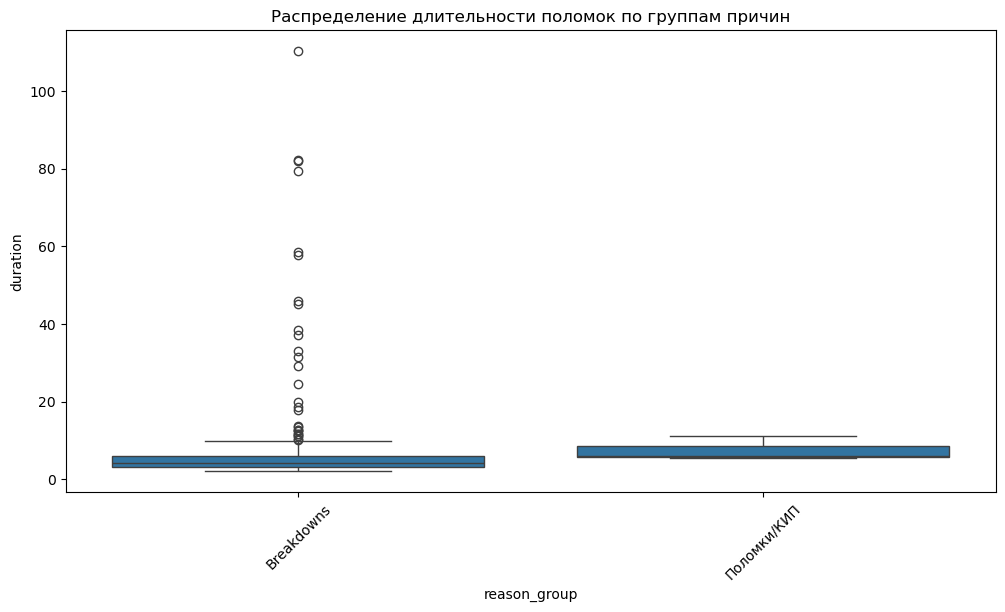

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reason_group', y='duration', data=breakdowns_df)
plt.title('Распределение длительности поломок по группам причин')
plt.xticks(rotation=45)
plt.show()

## Анализ временных рядов

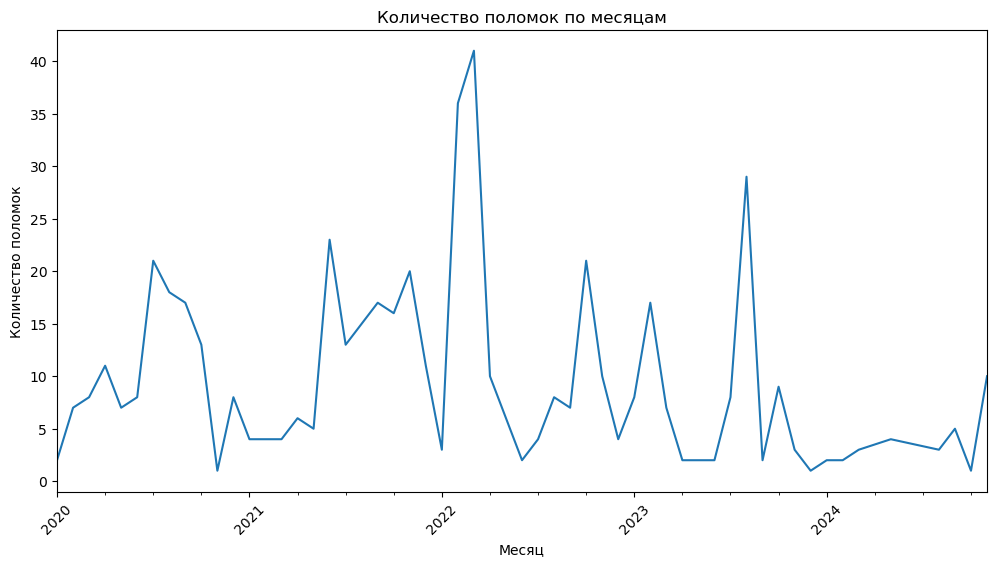

In [17]:
breakdowns_df['month'] = breakdowns_df['start'].dt.to_period('M')
monthly_breakdowns = breakdowns_df.groupby('month').size()
plt.figure(figsize=(12, 6))
monthly_breakdowns.plot()
plt.title('Количество поломок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поломок')
plt.xticks(rotation=45)
plt.show()